In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
# Load the dataset
file_path = "01 Call-Center-Dataset.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head(20)

,Call Id,Agent,Date,Time,Department,Answered (Y/N),Resolved,Speed of answer in seconds,AvgTalkDuration,Satisfaction rating
0,ID0001,Diane,2021-01-01,09:12:58,Contract related,Y,Y,109.0,00:02:23,3.0
1,ID0002,Becky,2021-01-01,09:12:58,Technical Support,Y,N,70.0,00:04:02,3.0
2,ID0003,Stewart,2021-01-01,09:47:31,Contract related,Y,Y,10.0,00:02:11,3.0
3,ID0004,Greg,2021-01-01,09:47:31,Contract related,Y,Y,53.0,00:00:37,2.0
4,ID0005,Becky,2021-01-01,10:00:29,Payment related,Y,Y,95.0,00:01:00,3.0
5,ID0006,Stewart,2021-01-01,10:00:29,Technical Support,N,N,NaN,NaN,NaN
6,ID0007,Diane,2021-01-01,10:22:05,Payment related,Y,Y,24.0,00:03:40,2.0
7,ID0008,Diane,2021-01-01,10:22:05,Payment related,Y,Y,22.0,00:00:38,4.0
8,ID0009,Greg,2021-01-01,11:13:55,Admin Support,Y,Y,15.0,00:06:38,4.0
9,ID0010,Jim,2021-01-01,11:13:55,Streaming,Y,Y,78.0,00:01:04,3.0


In [4]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

In [5]:
# Convert Answered and Resolved columns to binary values
df["Answered"] = df["Answered (Y/N)"].map({"Y": 1, "N": 0})
df["Resolved"] = df["Resolved"].map({"Y": 1, "N": 0})


In [6]:
# Extract week number and weekday
df["Week_Number"] = df["Date"].dt.isocalendar().week
df["Weekday"] = df["Date"].dt.day_name()

In [7]:
# Convert AvgTalkDuration from time format to total seconds
df["AvgTalkDuration_seconds"] = df["AvgTalkDuration"].apply(
    lambda x: x.hour * 3600 + x.minute * 60 + x.second if pd.notnull(x) else None
)

In [8]:
#  Task 1 . Function to analyze weekly performance
def weekly_analysis(week):
    data = df[df["Week_Number"] == week]
    total_calls = len(data)
    calls_answered = data["Answered"].sum()
    avg_speed_of_answer = data["Speed of answer in seconds"].mean()
    abandon_rate = 1 - (calls_answered / total_calls) if total_calls > 0 else 0
    avg_call_per_min = data["AvgTalkDuration_seconds"].sum() / (total_calls * 60) if total_calls > 0 else 0
    satisfaction_overall = data["Satisfaction rating"].mean()
    calls_less_180 = len(data[data["AvgTalkDuration_seconds"] < 180])
    percent_calls_less_180 = (calls_less_180 / total_calls) * 100 if total_calls > 0 else 0
    satisfaction_below_3 = len(data[data["Satisfaction rating"] <= 3])
    
    result = pd.DataFrame({
        "DETAILS": [
            "Total Calls", "Calls Answered", "Avg Speed of Answer", "Abandon Rate", 
            "Avg Call/Min", "Satisfaction Overall", "Calls < 180 Seconds", 
            "% Calls < 180 Seconds", "Satisfaction ≤ 3"
        ],
        "Value": [
            total_calls, calls_answered, avg_speed_of_answer, abandon_rate, 
            avg_call_per_min, satisfaction_overall, calls_less_180, 
            percent_calls_less_180, satisfaction_below_3
        ]
    })
    return result

In [9]:
weekly_output = weekly_analysis(8)  # Analyze Week 
print(weekly_output)

                 DETAILS       Value
0            Total Calls  392.000000
1         Calls Answered  314.000000
2    Avg Speed of Answer   68.050955
3           Abandon Rate    0.198980
4           Avg Call/Min    3.076828
5   Satisfaction Overall    3.414013
6    Calls < 180 Seconds  115.000000
7  % Calls < 180 Seconds   29.336735
8       Satisfaction ≤ 3  149.000000


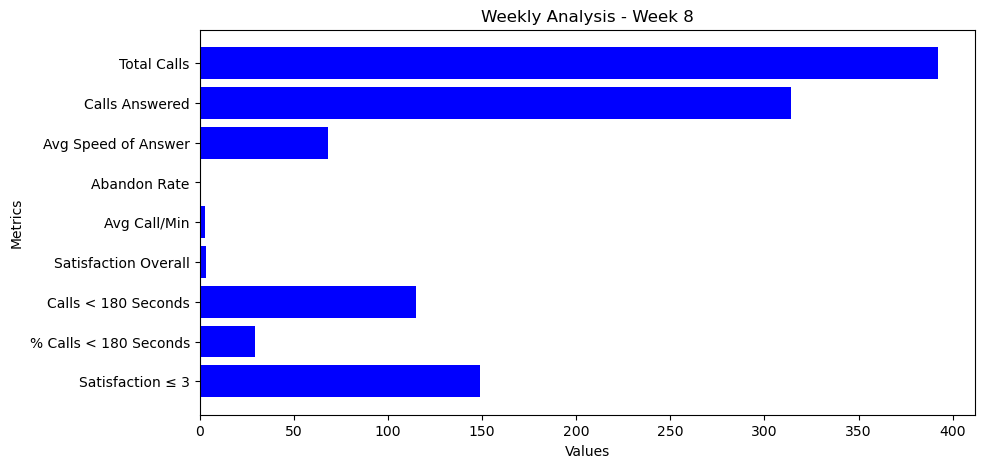

In [10]:
# Function to visualize weekly analysis results
def plot_weekly_analysis(week):
    weekly_output = weekly_analysis(week)
    if weekly_output is None:
        print(f"No data available for Week {week}")
        return

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.barh(weekly_output["DETAILS"], weekly_output["Value"], color='blue')
    plt.xlabel("Values")
    plt.ylabel("Metrics")
    plt.title(f"Weekly Analysis - Week {week}")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Example: Plot for Week 5
plot_weekly_analysis(8)

In [11]:
#3.	Make a function to accept agent name and get the below mentioned values of respective agent
def agent_analysis(agent_name):
    data = df[df["Agent"] == agent_name]
    
    total_calls = len(data)
    calls_answered = data["Answered"].sum()
    avg_speed_of_answer = data["Speed of answer in seconds"].mean()
    call_resolved = data["Resolved"].sum()
    call_resolution_percentage = (call_resolved / total_calls) * 100 if total_calls > 0 else 0
    
    result = pd.DataFrame({
        "Metric": [
            "Total Calls", "Calls Answered", "Avg Speed of Answer", "Call Resolution %", "Call Resolved"
        ],
        "Value": [
            total_calls, calls_answered, avg_speed_of_answer, call_resolution_percentage, call_resolved
        ]
    })
    return result

In [12]:
agent_output = agent_analysis("Greg")  # Analyze specific agent
print(agent_output)

                Metric       Value
0          Total Calls  624.000000
1       Calls Answered  502.000000
2  Avg Speed of Answer   68.444223
3    Call Resolution %   72.916667
4        Call Resolved  455.000000


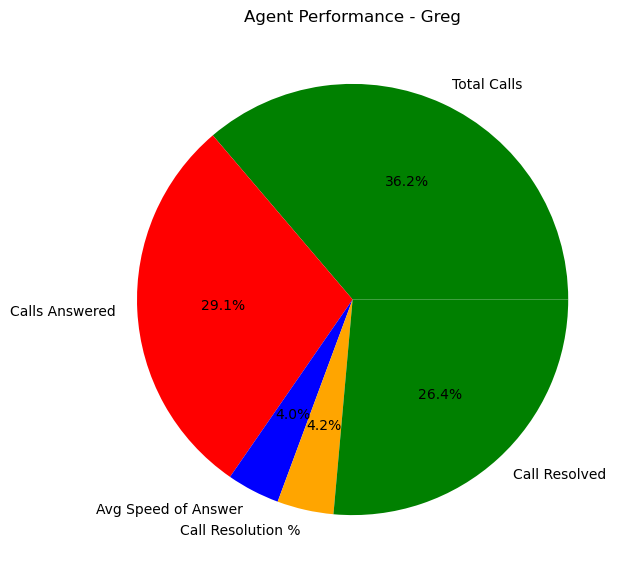

In [13]:
def plot_agent_analysis(agent_name):
    agent_output = agent_analysis(agent_name)
    if agent_output is None:
        print(f"No data available for Agent: {agent_name}")
        return

    # Plot the results using a pie chart
    plt.figure(figsize=(7, 7))
    plt.pie(agent_output["Value"], labels=agent_output["Metric"], autopct='%1.1f%%', colors=['green', 'red', 'blue', 'orange'])
    plt.title(f"Agent Performance - {agent_name}")
    plt.show()

# Example: Plot for Agent 
plot_agent_analysis("Greg")


In [15]:
# Function to analyze agent performance by weekday
def agent_analysis_by_weekday(agent_name):
    data = df[df["Agent"] == agent_name]
    grouped = data.groupby("Weekday").agg(
        Total_Calls=("Call Id", "count"),
        Calls_Answered=("Answered", "sum"),
        Avg_Speed_of_Answer=("Speed of answer in seconds", "mean"),
        Call_Resolved=("Resolved", "sum")
    ).reset_index()
    
    grouped["Call_Resolution_%"] = (grouped["Call_Resolved"] / grouped["Total_Calls"]) * 100
    return grouped


In [16]:
agent_weekday_output = agent_analysis_by_weekday("Greg")  # Analyze agent by weekday
print(agent_weekday_output)


     Weekday  Total_Calls  Calls_Answered  Avg_Speed_of_Answer  Call_Resolved  \
0     Friday           79              65            69.692308             58   
1     Monday           86              71            62.239437             63   
2   Saturday          103              83            66.638554             72   
3     Sunday           89              73            71.342466             65   
4   Thursday           89              72            69.500000             68   
5    Tuesday           94              78            72.012821             73   
6  Wednesday           84              60            67.500000             56   

   Call_Resolution_%  
0          73.417722  
1          73.255814  
2          69.902913  
3          73.033708  
4          76.404494  
5          77.659574  
6          66.666667  


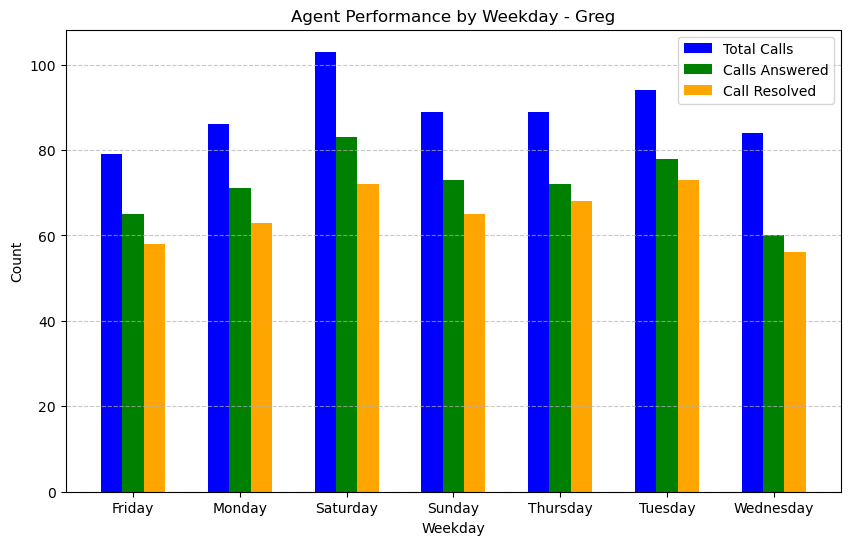

In [17]:
# Function to visualize agent's performance by weekday
def plot_agent_weekday_analysis(agent_name):
    agent_weekday_output = agent_analysis_by_weekday(agent_name)
    if agent_weekday_output is None:
        print(f"No data available for Agent: {agent_name}")
        return

    # Bar Chart
    plt.figure(figsize=(10, 6))
    width = 0.2  # Bar width

    # Bar positions for different metrics
    x = np.arange(len(agent_weekday_output["Weekday"]))
    
    plt.bar(x - width, agent_weekday_output["Total_Calls"], width, label="Total Calls", color="blue")
    plt.bar(x, agent_weekday_output["Calls_Answered"], width, label="Calls Answered", color="green")
    plt.bar(x + width, agent_weekday_output["Call_Resolved"], width, label="Call Resolved", color="orange")

    # Formatting
    plt.xlabel("Weekday")
    plt.ylabel("Count")
    plt.title(f"Agent Performance by Weekday - {agent_name}")
    plt.xticks(ticks=x, labels=agent_weekday_output["Weekday"])
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.show()

# Example: Plot for Agent "Alice"
plot_agent_weekday_analysis("Greg")

In [18]:
# Function to analyze department performance
def department_analysis(department_name):
    data = df[df["Department"] == department_name]
    
    total_calls = len(data)
    calls_answered = data["Answered"].sum()
    avg_speed_of_answer = data["Speed of answer in seconds"].mean()
    call_resolved = data["Resolved"].sum()
    call_resolution_percentage = (call_resolved / total_calls) * 100 if total_calls > 0 else 0
    
    result = pd.DataFrame({
        "Metric": [
            "Total Calls", "Calls Answered", "Avg Speed of Answer", "Call Resolution %", "Call Resolved"
        ],
        "Value": [
            total_calls, calls_answered, avg_speed_of_answer, call_resolution_percentage, call_resolved
        ]
    })
    return result


In [19]:
# Example Usage
department_output = department_analysis("Technical Support")  # Analyze specific department
print(department_output)

                Metric        Value
0          Total Calls  1019.000000
1       Calls Answered   805.000000
2  Avg Speed of Answer    68.110559
3    Call Resolution %    72.227674
4        Call Resolved   736.000000


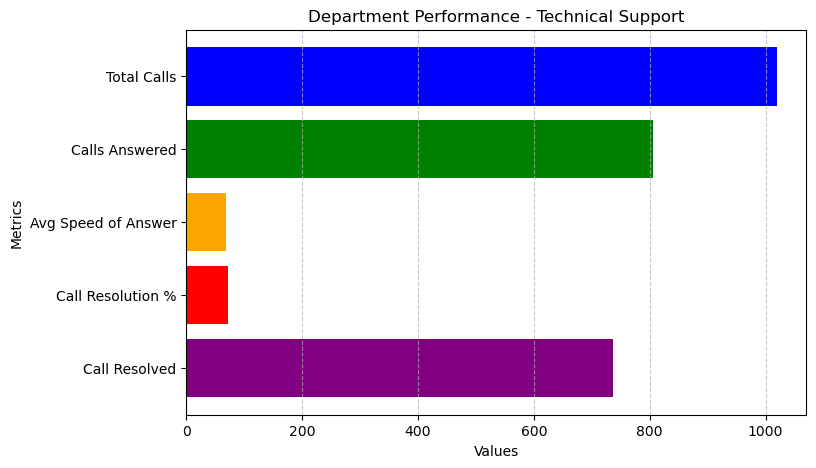

In [20]:
def plot_department_analysis(department_name):
    dept_output = department_analysis(department_name)
    if dept_output is None:
        print(f"No data available for Department: {department_name}")
        return

    # Bar Chart
    plt.figure(figsize=(8, 5))
    plt.barh(dept_output["Metric"], dept_output["Value"], color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.xlabel("Values")
    plt.ylabel("Metrics")
    plt.title(f"Department Performance - {department_name}")
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    
    plt.show()
    # Example: Plot for Department "Sales"
plot_department_analysis("Technical Support")

In [21]:
# Function to analyze department SLA compliance
def department_sla_analysis(department_name):
    data = df[df["Department"] == department_name]
    
    total_calls = len(data)
    calls_answered = data["Answered"].sum()
    abandoned_calls = total_calls - calls_answered
    abandoned_calls_percent = (abandoned_calls / total_calls) * 100 if total_calls > 0 else 0
    sla_limit = 20  # Maximum 20% abandonment allowed
    sla_breached = "Yes" if abandoned_calls_percent > sla_limit else "No"
    
    result = pd.DataFrame({
        "Metric": [
            "Total Calls", "Calls Answered", "Abandoned Calls %", "SLA Limit (20% Max)", "SLA Breached (Yes/No)"
        ],
        "Value": [
            total_calls, calls_answered, abandoned_calls_percent, sla_limit, sla_breached
        ]
    })
    return result

In [22]:
# Example Usage
department_sla_output = department_sla_analysis("Technical Support")  # Analyze specific department SLA
print(department_sla_output)


                  Metric      Value
0            Total Calls       1019
1         Calls Answered        805
2      Abandoned Calls %  21.000981
3    SLA Limit (20% Max)         20
4  SLA Breached (Yes/No)        Yes


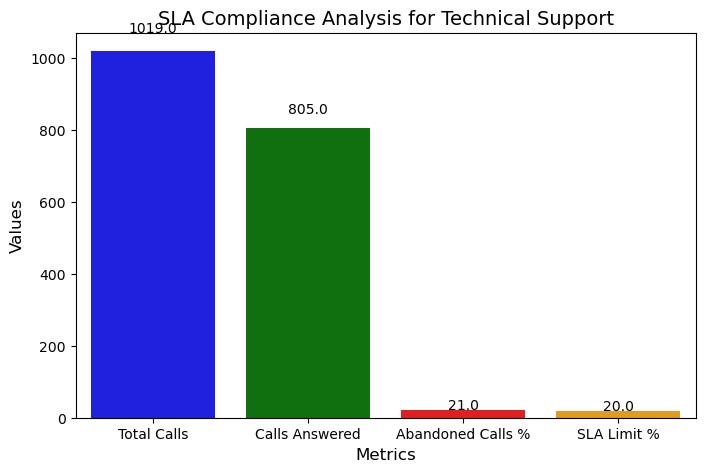

In [26]:
def plot_sla_bar_chart(department_name):
    # Run the SLA analysis
    result = department_sla_analysis(department_name)

    # Extract values for visualization
    total_calls = result[result['Metric'] == 'Total Calls']['Value'].values[0]
    calls_answered = result[result['Metric'] == 'Calls Answered']['Value'].values[0]
    abandoned_calls_percent = result[result['Metric'] == 'Abandoned Calls %']['Value'].values[0]
    sla_limit = result[result['Metric'] == 'SLA Limit (20% Max)']['Value'].values[0]

    # Create data for visualization
    data = pd.DataFrame({
        "Metric": ["Total Calls", "Calls Answered", "Abandoned Calls %", "SLA Limit %"],
        "Value": [total_calls, calls_answered, abandoned_calls_percent, sla_limit],
        "Category": ["Total", "Answered", "Abandoned", "SLA Limit"]  # Assign hue categories
    })

    # Create the bar plot with hue
    plt.figure(figsize=(8, 5))
    sns.barplot(data=data, x="Metric", y="Value", hue="Category", palette=["blue", "green", "red", "orange"], legend=False)

    # Add title and labels
    plt.title(f"SLA Compliance Analysis for {department_name}", fontsize=14)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Values", fontsize=12)

    # Annotate values on the bars
    for i, v in enumerate(data["Value"]):
        plt.text(i, v + (v * 0.05), f"{v:.1f}", ha='center', fontsize=10)

    # Show the plot
    plt.show()

# Example usage:
plot_sla_bar_chart("Technical Support")

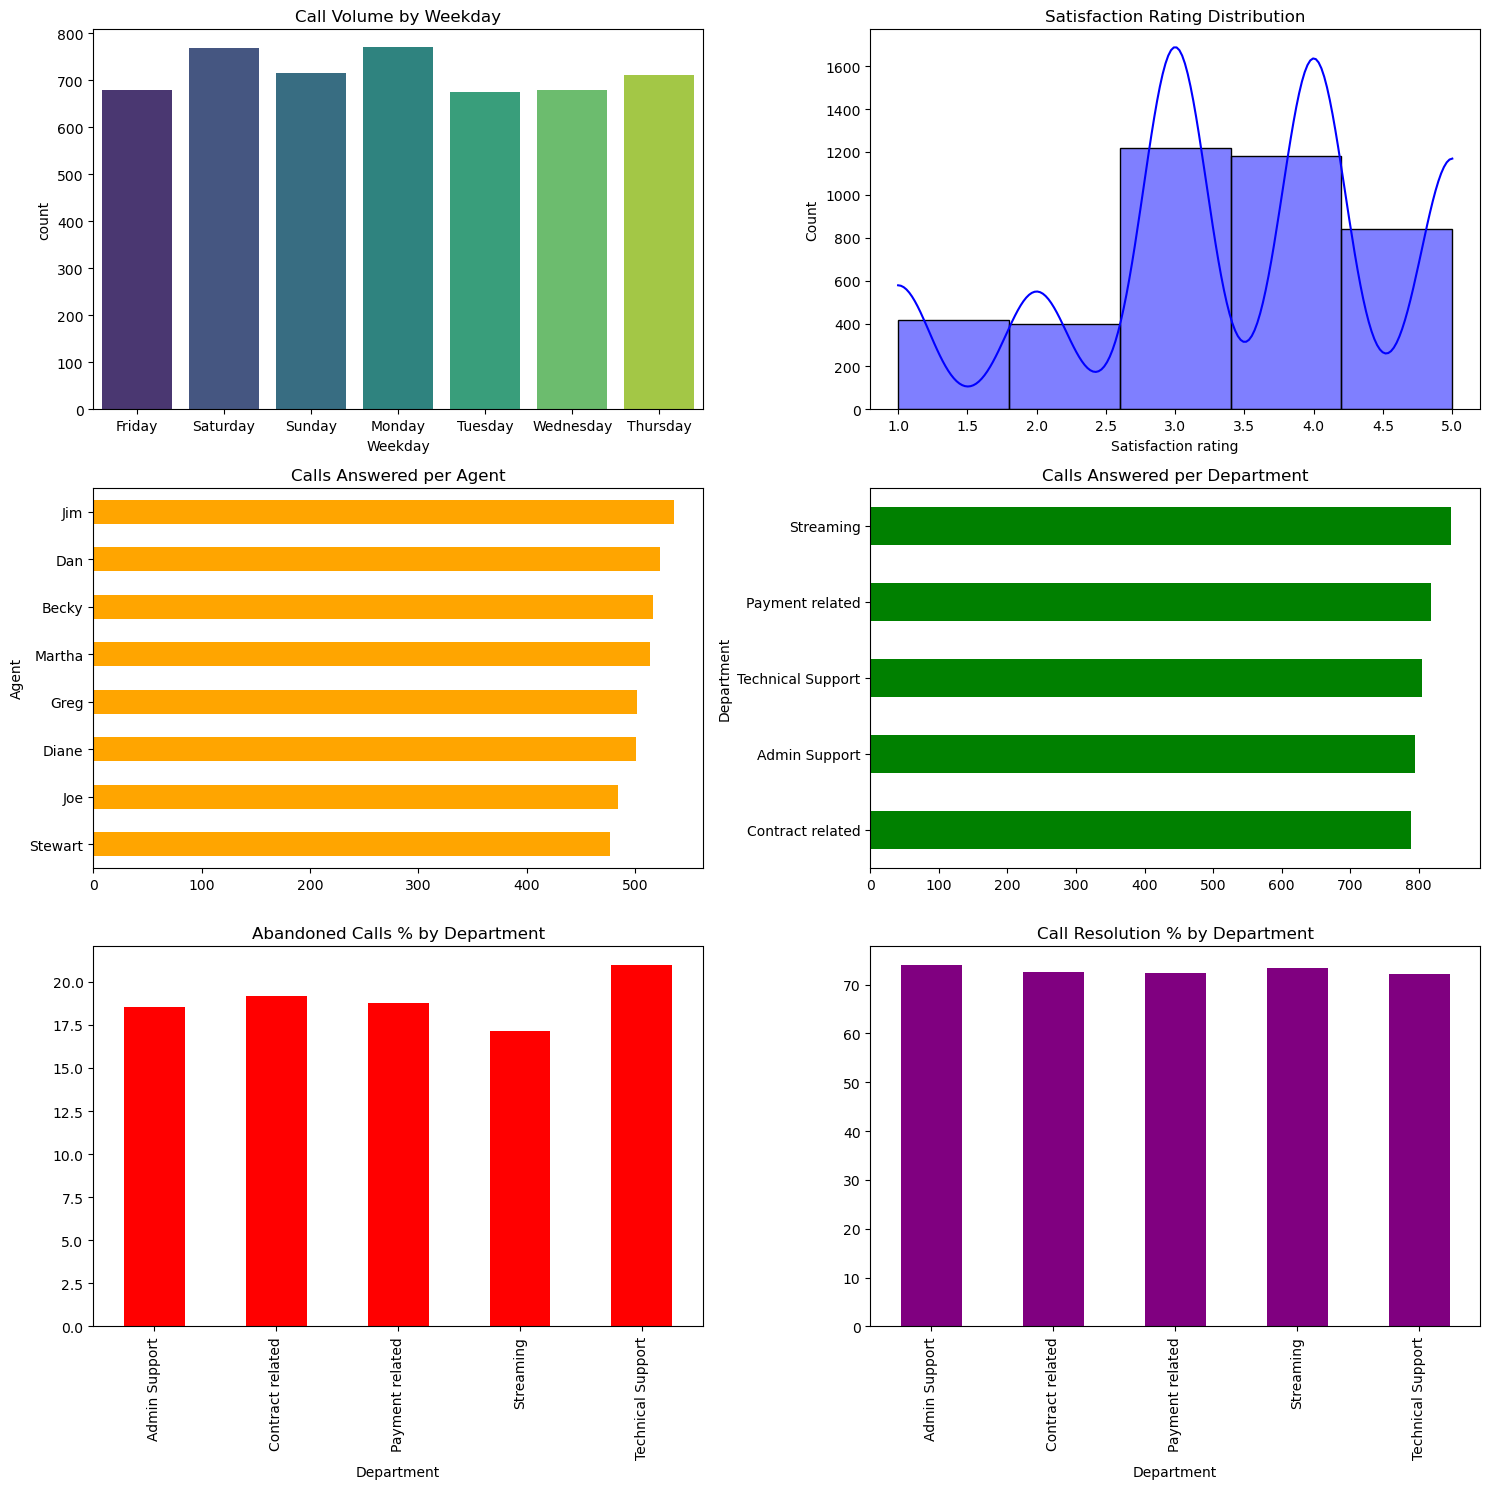

In [31]:
# Function to create a dashboard visualization
def call_centre_dashboard():
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    
    # Weekly Call Trends
    sns.countplot(data=df, x="Weekday", ax=axes[0, 0], hue="Weekday", palette="viridis", legend=False)
    axes[0, 0].set_title("Call Volume by Weekday")
    
    # Satisfaction Rating Distribution
    sns.histplot(df["Satisfaction rating"], bins=5, kde=True, ax=axes[0, 1], color="blue")
    axes[0, 1].set_title("Satisfaction Rating Distribution")
    
    # Agent Performance
    agent_performance = df.groupby("Agent")["Answered"].sum().sort_values()
    agent_performance.plot(kind="barh", ax=axes[1, 0], color="orange")
    axes[1, 0].set_title("Calls Answered per Agent")
    
    # Department Performance
    department_performance = df.groupby("Department")["Answered"].sum().sort_values()
    department_performance.plot(kind="barh", ax=axes[1, 1], color="green")
    axes[1, 1].set_title("Calls Answered per Department")
    
    # Abandoned Calls by Department
    df["Abandoned"] = 1 - df["Answered"]
    abandoned_per_department = df.groupby("Department")["Abandoned"].mean() * 100
    abandoned_per_department.plot(kind="bar", ax=axes[2, 0], color="red")
    axes[2, 0].set_title("Abandoned Calls % by Department")
    
    # Call Resolution Rate
    resolution_rate = df.groupby("Department")["Resolved"].mean() * 100
    resolution_rate.plot(kind="bar", ax=axes[2, 1], color="purple")
    axes[2, 1].set_title("Call Resolution % by Department")
    
    plt.tight_layout()
    plt.show()

# Example Usage
call_centre_dashboard()